# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


# Required Preprocessing 

In [4]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [5]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

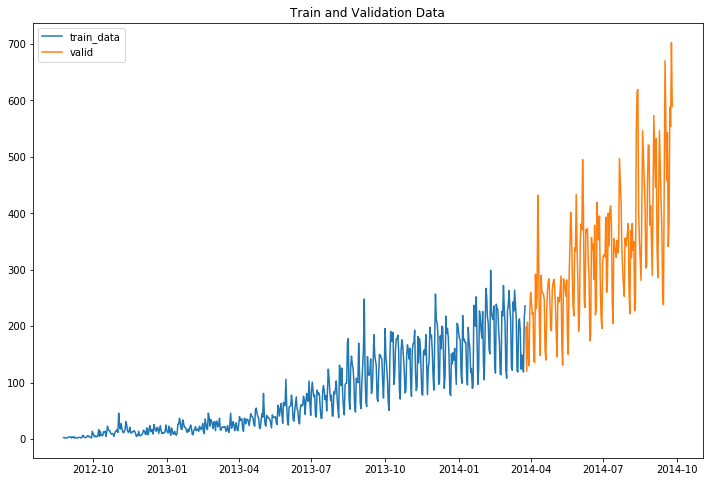

In [6]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Prophet

In [7]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [8]:
train_data.head()

,Date,count
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


In [9]:
df = train_data[['Date', 'count']]

df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [10]:
df.head()

,ds,y
Date,,
2012-08-25,2012-08-25,3
2012-08-26,2012-08-26,3
2012-08-27,2012-08-27,2
2012-08-28,2012-08-28,2
2012-08-29,2012-08-29,2


INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


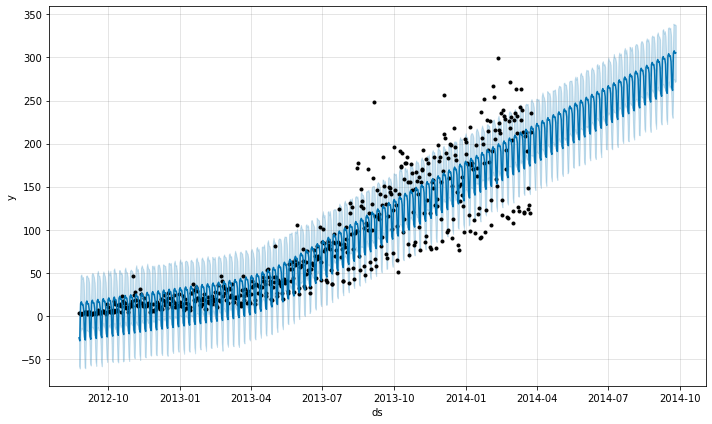

In [11]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=184,freq="D")
forecast = model.predict(future)
fig = model.plot(forecast)

In [12]:
train_data.shape, valid_data.shape

((578, 2), (184, 2))

In [13]:
len(forecast['yhat'][578:].values)

184

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,0.816224,-58.009104,5.919498,0.816224,0.816224,-26.345945,-26.345945,-26.345945,-26.345945,-26.345945,-26.345945,0.0,0.0,0.0,-25.529721
1,2012-08-26,0.946085,-61.173432,3.787827,0.946085,0.946085,-29.915717,-29.915717,-29.915717,-29.915717,-29.915717,-29.915717,0.0,0.0,0.0,-28.969632
2,2012-08-27,1.075946,-18.257123,46.726718,1.075946,1.075946,13.177138,13.177138,13.177138,13.177138,13.177138,13.177138,0.0,0.0,0.0,14.253084
3,2012-08-28,1.205807,-13.813518,48.219714,1.205807,1.205807,15.136135,15.136135,15.136135,15.136135,15.136135,15.136135,0.0,0.0,0.0,16.341942
4,2012-08-29,1.335668,-15.027502,42.865964,1.335668,1.335668,11.588917,11.588917,11.588917,11.588917,11.588917,11.588917,0.0,0.0,0.0,12.924585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2014-09-21,291.673924,229.910702,295.774852,282.788809,300.088391,-29.915717,-29.915717,-29.915717,-29.915717,-29.915717,-29.915717,0.0,0.0,0.0,261.758207
758,2014-09-22,292.156167,274.540878,339.307247,283.193495,300.642828,13.177138,13.177138,13.177138,13.177138,13.177138,13.177138,0.0,0.0,0.0,305.333305
759,2014-09-23,292.638409,274.981847,337.852707,283.568095,301.200835,15.136135,15.136135,15.136135,15.136135,15.136135,15.136135,0.0,0.0,0.0,307.774545
760,2014-09-24,293.120652,271.426909,338.438030,283.961006,301.757923,11.588917,11.588917,11.588917,11.588917,11.588917,11.588917,0.0,0.0,0.0,304.709569


In [14]:
valid_data['prophet'] =  forecast['yhat'][578:].values

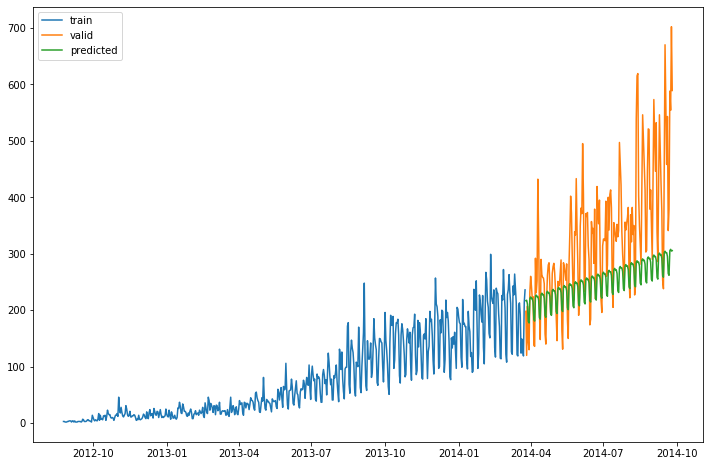

In [15]:
plt.figure(figsize=(12,8))

plt.plot(train_data['count'],  label='train') 
plt.plot(valid_data['count'],  label='valid') 
plt.plot(valid_data['prophet'],  label='predicted') 
plt.legend(loc='best') 
plt.show()

In [19]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['prophet']))
print('The RMSE value for Prophet is', rmse)

The RMSE value for Prophet is 118.35304149429835


In [17]:
forecast.index= forecast.ds

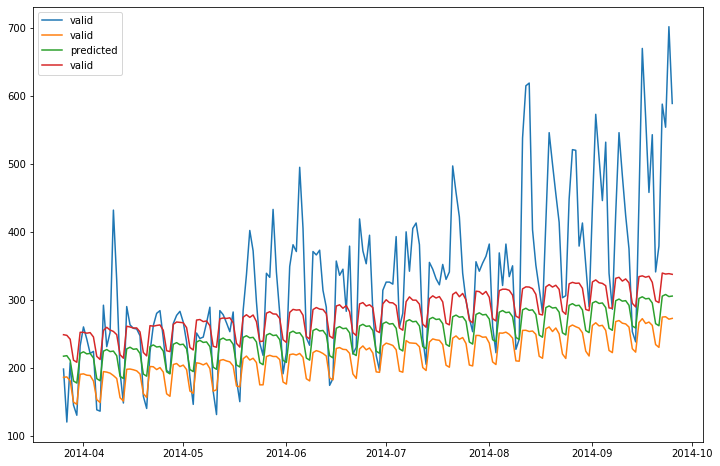

In [18]:
plt.figure(figsize=(12,8))

plt.plot(valid_data['count'],  label='valid') 
plt.plot(forecast['yhat_lower'][578:],  label='valid') 
plt.plot(forecast['yhat'][578:],  label='predicted') 
plt.plot(forecast['yhat_upper'][578:],  label='valid') 

plt.legend(loc='best') 
plt.show()